In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
nadia = cv2.imread('img/nadia.jpg',0)
denis = cv2.imread('img/denis.jpg',0)
solvey = cv2.imread('img/solvey.jpg',0)
tony = cv2.imread('img/tony.jpg',0)

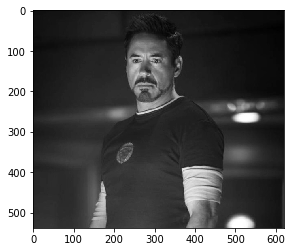

In [4]:
plt.imshow(tony,cmap='gray')

In [5]:
face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')

In [6]:
def detect_face(img):
    face_img = img.copy()
    
    face_rectan = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rectan:
        cv2.rectangle(face_img,(x,y),(x+w, y+h),(255,0,0),10)
    return face_img    

In [7]:
res = detect_face(solvey)

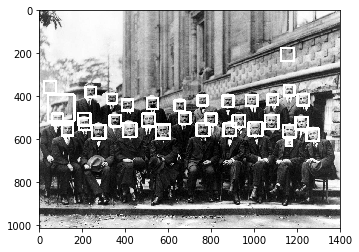

In [8]:
plt.imshow(res,cmap='gray')

In [9]:
def adj_detect_face(img):
    face_img = img.copy()
    
    face_rectan = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5)
    
    for (x,y,w,h) in face_rectan:
        cv2.rectangle(face_img,(x,y),(x+w, y+h),(255,0,0),10)
    return face_img    

In [10]:
result = adj_detect_face(solvey)

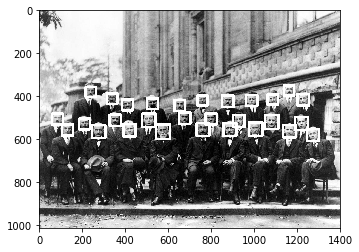

In [11]:
plt.imshow(result,cmap='gray')

In [12]:
eye_cascade = cv2.CascadeClassifier('data/haarcascade_eye.xml')

In [13]:
def detect_eye(img):
    eye_img = img.copy()
    
    eye_rectan = eye_cascade.detectMultiScale(eye_img,scaleFactor=1.4, minNeighbors=5)
    
    for (x,y,w,h) in eye_rectan:
        cv2.rectangle(eye_img,(x,y),(x+w, y+h),(255,0,0),9)
    return eye_img    

In [14]:
res = detect_eye(tony)

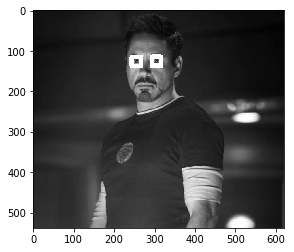

In [15]:
plt.imshow(res,cmap='gray')

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    frame = adj_detect_face(frame)
    
    cv2.imshow("Video Face detect", frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
        
 
cap.release()
cv2.destroyAllWindows()